In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib as mpl

In [60]:
from sbi.utils import BoxUniform
from torch.distributions import biject_to
prior = BoxUniform(-torch.ones(2), torch.ones(2))

In [109]:
def is_in_support(theta):
    condition = torch.sum(theta**2, dim=1) < 1.0
    return condition

In [110]:
resolution = 100
x = torch.linspace(-2, 2, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support = is_in_support(xy)
in_support = torch.reshape(in_support, (resolution, resolution))

In [111]:
_ = torch.manual_seed(0)
prior_samples = prior.sample((200,))
prior_samples = prior_samples[is_in_support(prior_samples)][:40]

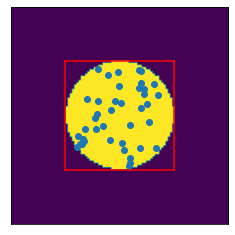

In [112]:
linecol = "r"
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
_ = ax.imshow(in_support.numpy(), extent=(-2, 2, -2, 2))
_ = ax.scatter(prior_samples[:, 0].numpy(), prior_samples[:, 1].numpy())
_ = ax.plot([-1, -1], [-1, 1], c=linecol)
_ = ax.plot([1, 1], [-1, 1], c=linecol)
_ = ax.plot([-1, 1], [-1, -1], c=linecol)
_ = ax.plot([-1, 1], [1, 1], c=linecol)
_ = ax.set_xticks([])
_ = ax.set_yticks([])

In [113]:
bijection = biject_to(prior.support)

In [114]:
resolution = 100
x = torch.linspace(-5, 5, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support = is_in_support(bijection(xy))
in_support = torch.reshape(in_support, (resolution, resolution))

In [115]:
inverse_prior = bijection.inv(prior_samples)

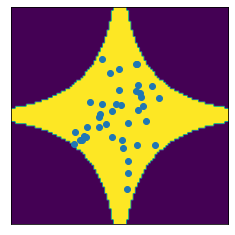

In [116]:
linecol = "r"
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
_ = ax.imshow(in_support.numpy(), extent=(-5, 5, -5, 5))
_ = ax.scatter(inverse_prior[:, 0].numpy(), inverse_prior[:, 1].numpy())
_ = ax.set_xticks([])
_ = ax.set_yticks([])

In [144]:
def is_in_support_unconstrained(theta):
    condition = torch.sum(theta**2, dim=1) < 14.0
    return condition

In [145]:
resolution = 100
x = torch.linspace(-5, 5, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support = is_in_support_unconstrained(xy)
in_support = torch.reshape(in_support, (resolution, resolution))

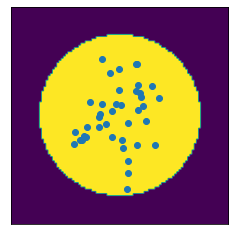

In [146]:
linecol = "r"
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
_ = ax.imshow(in_support.numpy(), extent=(-5, 5, -5, 5))
_ = ax.scatter(inverse_prior[:, 0].numpy(), inverse_prior[:, 1].numpy())
# _ = ax.plot([-1, -1], [-1, 1], c=linecol)
# _ = ax.plot([1, 1], [-1, 1], c=linecol)
# _ = ax.plot([-1, 1], [-1, -1], c=linecol)
# _ = ax.plot([-1, 1], [1, 1], c=linecol)
_ = ax.set_xticks([])
_ = ax.set_yticks([])